<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Fundamentos de Aprendizado de Máquina
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Teoria;</li>
  <li>Atributos categóricos;</li>
  <li>Atributos numéricos;</li>
  <li>Dados faltantes.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é preparar a base de dados para prever a espécie do penguin (variável resposta) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = sns.load_dataset('penguins')

In [3]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [17]:
# resposta da questão 1.1

# Verificar quantos valores faltantes existem
print("Valores faltantes por coluna:")
print(data.isnull().sum())

# Remover as linhas que têm valores faltantes
data = data.dropna()

# Verificar novamente para garantir que todos os NaNs foram removidos
print("\nDepois de tratar os dados:")
print(data.isnull().sum())

# Visualizar as primeiras linhas do dataset limpo
data.head()


Valores faltantes por coluna:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Depois de tratar os dados:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **1.2. Variáveis numéricas**

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [16]:
# resposta da questão 1.2


print("📊 Métricas principais:\n")

for coluna in data.select_dtypes(include=[np.number]).columns:
    media = data[coluna].mean()
    desvio = data[coluna].std()
    print(f"Coluna: {coluna}")
    print(f"  → Média: {media:.2f}")
    print(f"  → Desvio Padrão: {desvio:.2f}\n")


📊 Métricas principais:

Coluna: bill_length_mm
  → Média: 43.99
  → Desvio Padrão: 5.47

Coluna: bill_depth_mm
  → Média: 17.16
  → Desvio Padrão: 1.97

Coluna: flipper_length_mm
  → Média: 200.97
  → Desvio Padrão: 14.02

Coluna: body_mass_g
  → Média: 4207.06
  → Desvio Padrão: 805.22



### **1.3. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

🔗 Matriz de Correlação:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


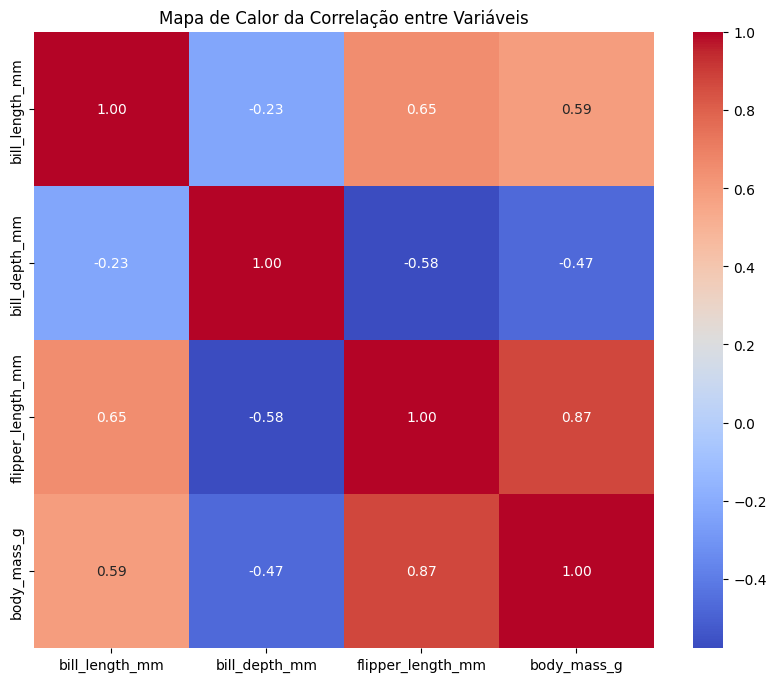

In [15]:
# resposta da questão 1.3

import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas as colunas numéricas para calcular a correlação
colunas_numericas = data.select_dtypes(include=[np.number]).columns
correlacao = data[colunas_numericas].corr()

# Exibir a matriz
print("🔗 Matriz de Correlação:")
print(correlacao)

# Criar um mapa de calor para visualizar
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor da Correlação entre Variáveis")
plt.show()

### **1.4. Limpeza**

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

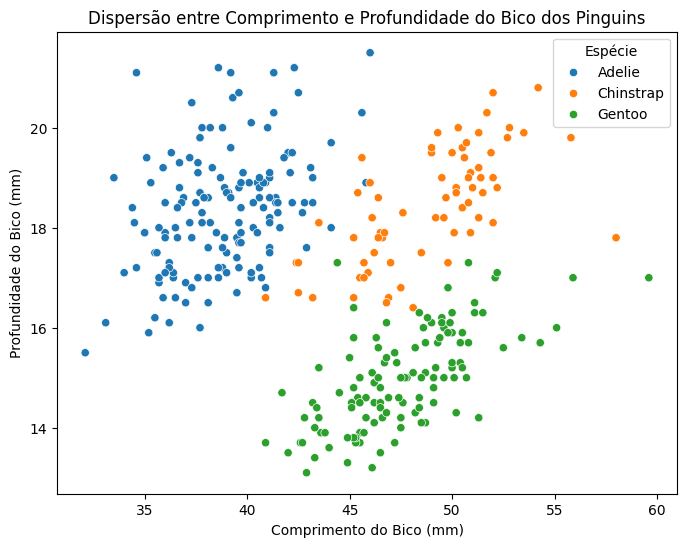

In [14]:
# resposta da questão 1.4

import matplotlib.pyplot as plt
import seaborn as sns

# Criar gráfico de dispersão (scatter plot)
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Dispersão entre Comprimento e Profundidade do Bico dos Pinguins')
plt.xlabel('Comprimento do Bico (mm)')
plt.ylabel('Profundidade do Bico (mm)')
plt.legend(title='Espécie')
plt.show()


---